In [147]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [148]:
img = cv2.imread("../image-classification/images/virat_kohli/12894e5ee6bea8206a8539aec10597c3ea1a5682.png")
img.shape

(412, 612, 3)

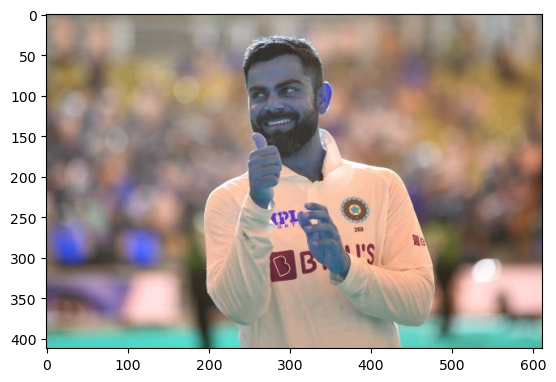

In [149]:
plt.imshow(img)

In [150]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(412, 612)

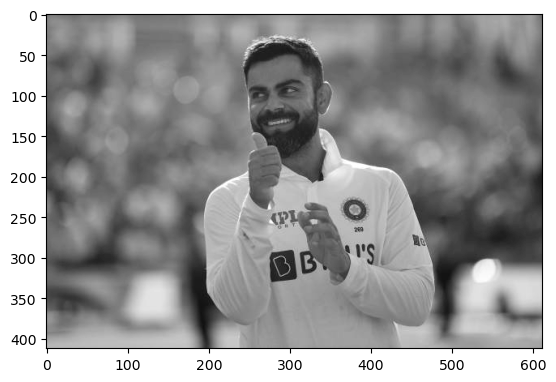

In [151]:
plt.imshow(gray, cmap='gray')

In [152]:
face_cascade = cv2.CascadeClassifier("../image-classification/opencv/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("../image-classification/opencv/haarcascades/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[232,  55, 103, 103]])

In [153]:
(x,y,w,h) = faces[0]
x,y,w,h

(232, 55, 103, 103)

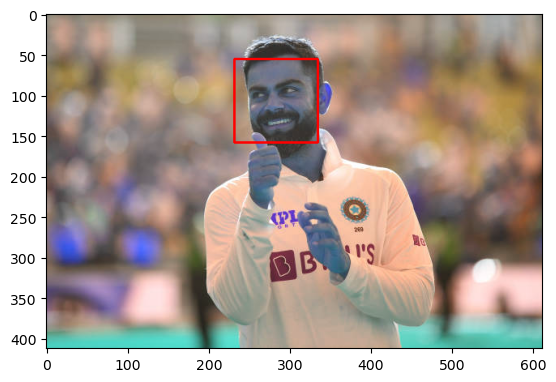

In [154]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

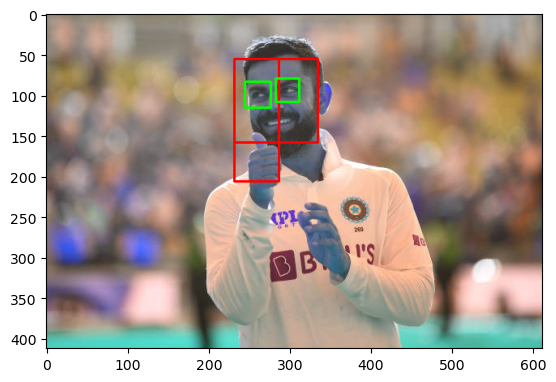

In [155]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+y,w+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color,(ex, ey), (ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img, cmap = 'gray')
plt.show()

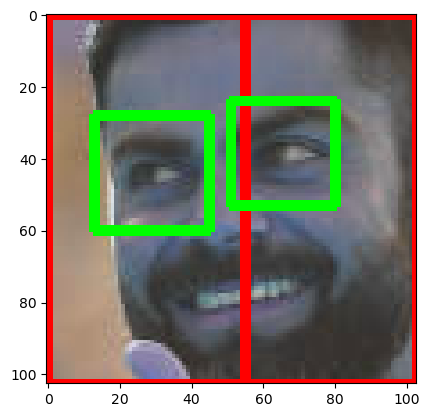

In [156]:

plt.imshow(roi_color, cmap='gray')

In [157]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    
    # Check if the image is loaded successfully
    if img is None:
        print(f"Error: Unable to load image at path {image_path}")
        return None
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # Check if any faces are detected
    if len(faces) == 0:
        print(f"No faces detected in image at path {image_path}")
        return None

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

    # If no suitable region is found
    print(f"No suitable region with 2 eyes found in image at path {image_path}")
    return None


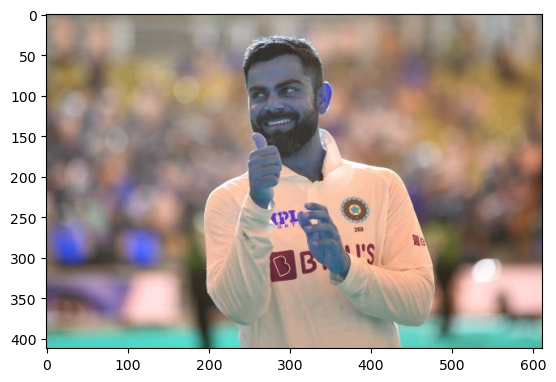

In [158]:
original_image = cv2.imread("../image-classification/images/virat_kohli/12894e5ee6bea8206a8539aec10597c3ea1a5682.png")
plt.imshow(original_image)

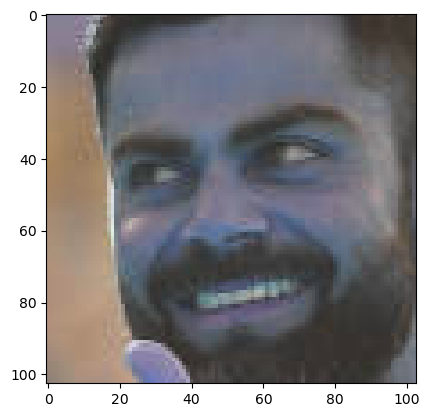

In [159]:
cropped_image = get_cropped_image_if_2_eyes("../image-classification/images/virat_kohli/12894e5ee6bea8206a8539aec10597c3ea1a5682.png")
plt.imshow(cropped_image)

In [160]:
path_to_data = "../image-classification/images"
path_to_cr_data = "../image-classification/images/cropped"

In [161]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [163]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

cropped_image_dirs = []
count = 1
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count +=1

In [ ]:
cropped_image_dirs = [] 
count = 1 
celebrity_file_names_dict = {} 
for img_dir in img_dirs: 
    celebrity_name = img_dir.split('\')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count +=1

In [171]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /=255;
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =np.uint8(imArray_H)
    
    return imArray_H

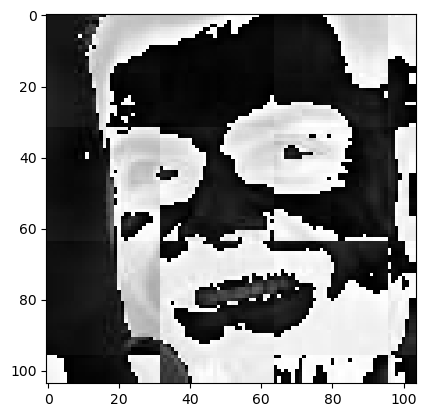

In [177]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')

In [180]:
class_dict = {}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count+1
class_dict

{'cropped': 0, 'messi': 1, 'rohit_shetty': 2, 'ronaldo': 3, 'virat_kohli': 4}

In [183]:
x=[]
y=[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32))
        img_har = w2d(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [185]:
len(x[0])

4096

In [186]:
x[0]

array([[ 19],
       [ 18],
       [ 22],
       ...,
       [203],
       [204],
       [204]], dtype=uint8)

In [187]:
x = np.array(x).reshape(len(x), 4096).astype(float)
x.shape

(35, 4096)

In [188]:
x[0]

array([ 19.,  18.,  22., ..., 203., 204., 204.])

In [192]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [195]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C= 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6666666666666666

In [196]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       1.00      1.00      1.00         2
           3       1.00      0.25      0.40         4

    accuracy                           0.67         9
   macro avg       0.83      0.75      0.69         9
weighted avg       0.83      0.67      0.62         9



In [197]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [198]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [200]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.653333,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.466667,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.726667,{'logisticregression__C': 1}


In [201]:
best_estimators['svm'].score(X_test,y_test)

0.6666666666666666

In [202]:
best_estimators['random_forest'].score(X_test,y_test)

0.4444444444444444

In [203]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7777777777777778

In [204]:
best_clf = best_estimators['svm']

In [207]:
from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[3, 0, 0],
       [0, 2, 0],
       [3, 0, 1]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

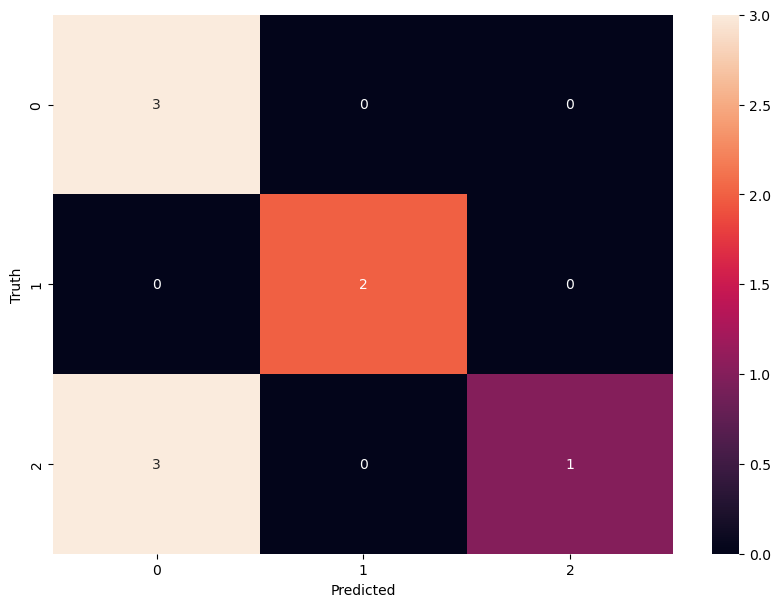

In [209]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [210]:
class_dict

{'cropped': 0, 'messi': 1, 'rohit_shetty': 2, 'ronaldo': 3, 'virat_kohli': 4}

In [212]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')


['saved_model.pkl']

In [213]:
import json
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))